# Econometrics Week 1 linear regression Assignment

| Name | Description | Date 
| :- |-------------: | :-:
|Thijs Meijerink| Econometrics| 16th of December 2022 |


## Questions
<ul>
<li><a href="#prep">Preparation</a></li>
<li><a href="#a">a </a></li>
<li><a href="#b">b</a></li>
<li><a href="#c">c</a></li>
<li><a href="#d">d</a></li>
</ul>


<a id='prep'></a>
## Preparation

In [46]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression as fp
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [47]:
file_location="./TestExer1-holiday expenditures-round2.xls"
TestExer = pd.read_excel(file_location)
TestExer.head() # sample data

,Observation,Age,Expenditures
0,1,49,95
1,2,15,104
2,3,43,91
3,4,45,98
4,5,40,94


<a id='a'></a>
## a
Use all data to estimate the coefficients a and b in a simple regression model, where expenditures is the
dependent variable and age is the explanatory factor. Also compute the standard error and the t-value of b.

In [57]:
x = TestExer.Age.values.reshape(-1,1) # independent variable
y = TestExer.Expenditures # dependent variable

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Expenditures   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     12.24
Date:                Fri, 16 Dec 2022   Prob (F-statistic):            0.00185
Time:                        12:51:23   Log-Likelihood:                -78.076
No. Observations:                  26   AIC:                             160.2
Df Residuals:                      24   BIC:                             162.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        114.2411      3.882     29.428      0.0

Thus coefficients are a= 114.23 and b= -0.33

Standard errors are a= 3.89 and b= 0.09

t-values are a= 29.43 and b= -3.49

<a id='b'></a>
## b
Make the scatter diagram of expenditures against age and add the regression line y = a + bx of part (a) in
this diagram. What conclusion do you draw from this diagram?

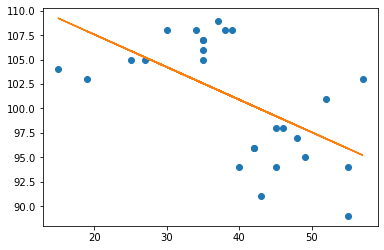

In [60]:
x1 = np.array(TestExer['Age'])
y1 = np.array(TestExer['Expenditures'])
plt.plot(x1, y1, 'o')

m, b = np.polyfit(x1, y1, 1)

plt.plot(x1, m*x1+b)
plt.show()

Concluding: The older the person the lower the expenditure.

<a id='c'></a>
## c
It seems there are two sets of observations in the scatter diagram, one for clients aged 40 or higher and
another for clients aged below 40. Divide the sample into these two clusters, and for each cluster estimate the
coefficients a and b and determine the standard error and t-value of b.

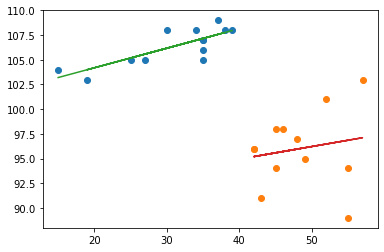

In [64]:
##Scatter plot
x1 = np.array(TestExer['Age'][TestExer['Age']<40])
y1 = np.array(TestExer['Expenditures'][TestExer['Age']<40])
plt.plot(x1, y1, 'o')

x2 = np.array(TestExer['Age'][TestExer['Age']>40])
y2 = np.array(TestExer['Expenditures'][TestExer['Age']>40])
plt.plot(x2, y2, 'o')

m, b = np.polyfit(x1, y1, 1)
plt.plot(x1, m*x1+b)
m, b = np.polyfit(x2, y2, 1)
plt.plot(x2, m*x2+b)
plt.show()

In [62]:
##Below 40
x = TestExer['Age'][TestExer['Age']<40].values.reshape(-1,1) # independent variable
y = TestExer['Expenditures'][TestExer['Age']<40] # dependent variable

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Expenditures   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     19.90
Date:                Fri, 16 Dec 2022   Prob (F-statistic):           0.000962
Time:                        13:05:06   Log-Likelihood:                -19.212
No. Observations:                  13   AIC:                             42.42
Df Residuals:                      11   BIC:                             43.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.2323      1.416     70.791      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [63]:
##Above 40
x = TestExer['Age'][TestExer['Age']>40].values.reshape(-1,1) # independent variable
y = TestExer['Expenditures'][TestExer['Age']>40] # dependent variable

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Expenditures   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                 -0.066
Method:                 Least Squares   F-statistic:                    0.3164
Date:                Fri, 16 Dec 2022   Prob (F-statistic):              0.586
Time:                        13:07:15   Log-Likelihood:                -32.603
No. Observations:                  12   AIC:                             69.21
Df Residuals:                      10   BIC:                             70.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         89.8584     10.979      8.184      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### Below 40
Thus coefficients are a= 100.23 and b= 0.19

Standard errors are a= 1.416 and b= 0.044

t-values are a= 70.79 and b= 4.460

#### Above 40
Thus coefficients are a= 89.85 and b= 0.12

Standard errors are a= 10.979 and b= 0.226

t-values are a= 8.184 and b= 0.563

<a id='d'></a>
## d
Discuss and explain the main differences between the outcomes in parts (a) and (c). Describe in words what
you have learned from these results.

It looks like the data is not consistant, it would therefore not trust it. Especially since the relation between the two group do not align. The group below 40 seems to have a stronger trend which might be an actual relationship. If we would treat the data as two groups, it seems that the expenditure increases with the age.